## Data Wrangling

In [1]:
import pandas as pd
import numpy as np

#### Loading data 

In [2]:
data = pd.read_excel('../raw_data/potential-talents.xlsx')

In [3]:
pd.set_option('display.max_colwidth',None)
data.head()

,id,job_title,location,connection,fit
0,1.0,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"Houston, Texas",85.0,NaN
1,2.0,Native English Teacher at EPIK (English Program in Korea),Kanada,500+,NaN
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44.0,NaN
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


#### drop id ( an id assigned ) and fit columns as they are not needed

In [4]:
cols_to_drop = ['id', 'fit']
data.drop(cols_to_drop, axis=1, inplace=True)

#### check data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job_title   104 non-null    object
 1   location    104 non-null    object
 2   connection  104 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [6]:
data.isnull().sum()

job_title     0
location      0
connection    0
dtype: int64

* There are no missing data in this data set
* The data has 3 variables and 104 observations

#### Check for duplicates and remove 

In [7]:
data_duplicate = data[data.duplicated()]
data_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 8 to 64
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job_title   51 non-null     object
 1   location    51 non-null     object
 2   connection  51 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [8]:
data_duplicate.head()

,job_title,location,connection
8,Student at Humber College and Aspiring Human Resources Generalist,Kanada,61.0
13,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"Houston, Texas",85.0
14,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"Houston, Texas",85.0
15,Native English Teacher at EPIK (English Program in Korea),Kanada,500+
16,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44.0


In [9]:
data.drop_duplicates(subset=['job_title'], inplace=True)

In [10]:
data.shape

(52, 3)

### Further cleaning of data
* Here Kanada should be changed to Canada
* Remove İzmir, Türkiye and Amerika Birleşik Devletleri as we are only considering US and Canada cities

In [11]:
data.reset_index(drop=True, inplace=True)

In [12]:
data.replace(to_replace = 'Kanada', value = 'Canada', inplace=True)

In [13]:
index_names = data[(data['location'] == 'İzmir, Türkiye') | (data['location'] == 'Amerika Birleşik Devletleri')].index

In [14]:
data.drop(index_names, inplace = True)

In [15]:
data.shape

(49, 3)

In [16]:
data.reset_index(drop=True, inplace=True)

In [17]:
# save the data to a new csv file
data.to_csv('../data/data_cleaned.csv', index=False)

## Text preprocessing

#### Perform the following steps

* Remove punctuations and other special characters
* Tokenization - Split the text into sentences and then into words. Remove punctuation and lowercase the words
* Remove all stop words
* Words are lemmatized - words in third person are changed to first person and verbs in past and future tenses are changed to present
* Words are stemmed - words are reduced to their root form

In [18]:
data_df = pd.read_csv('../data/data_cleaned.csv')

In [19]:
data_df.head()

,job_title,location,connection
0,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"Houston, Texas",85.0
1,Native English Teacher at EPIK (English Program in Korea),Canada,500+
2,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44.0
3,People Development Coordinator at Ryan,"Denton, Texas",500+
4,Aspiring Human Resources Specialist,Greater New York City Area,1.0


In [20]:
#remove words within brackets ()
data_df['job_title'] = data_df['job_title'].str.replace(r" \(.*\)","", regex=True)  

### Remove punctuation and digits, stopwords and Tokenize

In [21]:
import re
import string
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def clean_text(text):
    text = "".join([word for word in text if word not in (string.punctuation + string.digits)])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

data_df['job_title_nostop'] = data_df['job_title'].apply(lambda x: clean_text(x.lower()))

### Stem text

In [23]:
import nltk

ps = nltk.PorterStemmer()

In [24]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data_df['job_title_stemmed'] = data_df['job_title_nostop'].apply(lambda x: stemming(x))

data_df.head()

,job_title,location,connection,job_title_nostop,job_title_stemmed
0,2019 C.T. Bauer College of Business Graduate and aspiring Human Resources professional,"Houston, Texas",85.0,"[, ct, bauer, college, business, graduate, aspiring, human, resources, professional]","[, ct, bauer, colleg, busi, graduat, aspir, human, resourc, profession]"
1,Native English Teacher at EPIK,Canada,500+,"[native, english, teacher, epik]","[nativ, english, teacher, epik]"
2,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44.0,"[aspiring, human, resources, professional]","[aspir, human, resourc, profession]"
3,People Development Coordinator at Ryan,"Denton, Texas",500+,"[people, development, coordinator, ryan]","[peopl, develop, coordin, ryan]"
4,Aspiring Human Resources Specialist,Greater New York City Area,1.0,"[aspiring, human, resources, specialist]","[aspir, human, resourc, specialist]"


### Lemmatize text

In [25]:
wn = nltk.WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data_df['job_title_lemmatized'] = data_df['job_title_nostop'].apply(lambda x: lemmatizing(x))

data_df.head()

,job_title,location,connection,job_title_nostop,job_title_stemmed,job_title_lemmatized
0,2019 C.T. Bauer College of Business Graduate and aspiring Human Resources professional,"Houston, Texas",85.0,"[, ct, bauer, college, business, graduate, aspiring, human, resources, professional]","[, ct, bauer, colleg, busi, graduat, aspir, human, resourc, profession]","[, ct, bauer, college, business, graduate, aspiring, human, resource, professional]"
1,Native English Teacher at EPIK,Canada,500+,"[native, english, teacher, epik]","[nativ, english, teacher, epik]","[native, english, teacher, epik]"
2,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44.0,"[aspiring, human, resources, professional]","[aspir, human, resourc, profession]","[aspiring, human, resource, professional]"
3,People Development Coordinator at Ryan,"Denton, Texas",500+,"[people, development, coordinator, ryan]","[peopl, develop, coordin, ryan]","[people, development, coordinator, ryan]"
4,Aspiring Human Resources Specialist,Greater New York City Area,1.0,"[aspiring, human, resources, specialist]","[aspir, human, resourc, specialist]","[aspiring, human, resource, specialist]"


### Exploratory Data Analysis

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

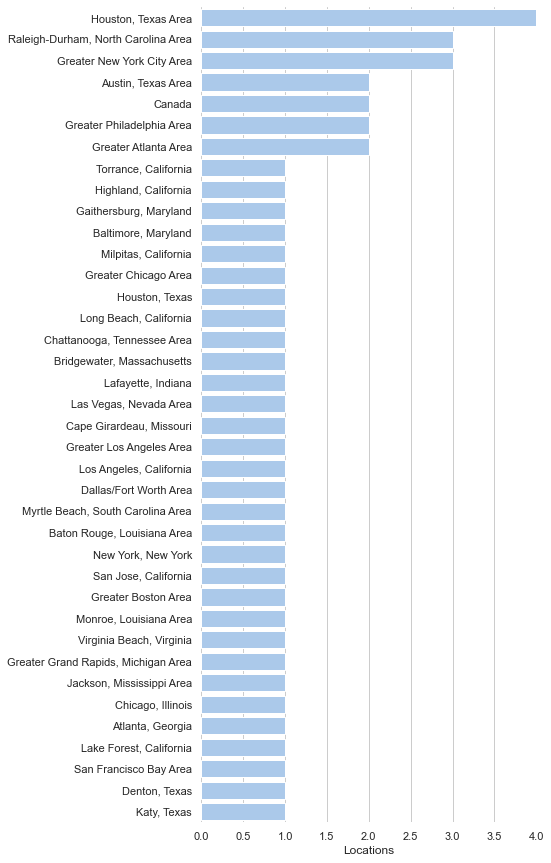

In [28]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")

locations = data_df['location'].value_counts()
sns.barplot(y=locations.index, x=locations, data=data_df, color='b')

ax.set(xlim=(0, 4), ylabel="",
       xlabel="Locations")
sns.despine(left=True, bottom=True)

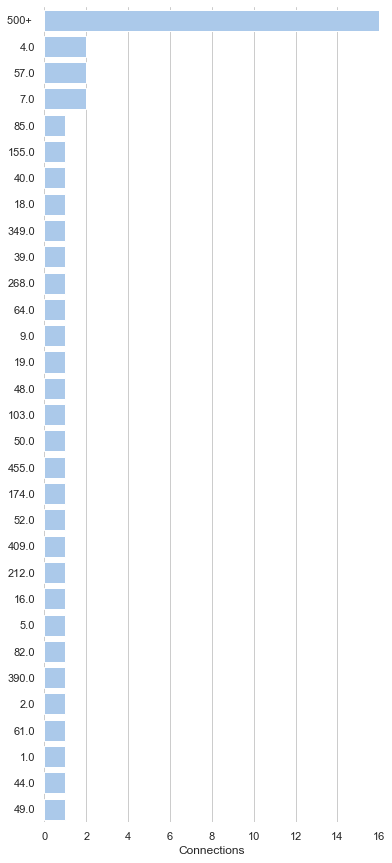

In [29]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")

connection = data_df['connection'].value_counts()
sns.barplot(y=connection.index, x=connection, data=data_df, color='b')

ax.set(xlim=(0, 16), ylabel="",
       xlabel="Connections")
sns.despine(left=True, bottom=True)